# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [1]:
from google.colab import files
upload=files.upload()

Saving crime_data.csv to crime_data.csv


In [2]:
import pandas as pd
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [45]:
list(df)

['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape']

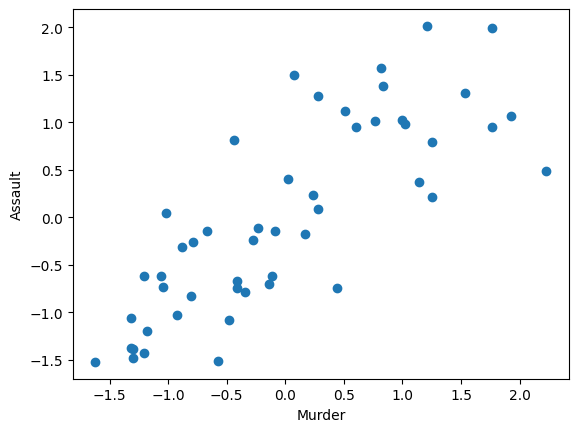

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df["Murder"],df["Assault"])
plt.ylabel("Assault")
plt.xlabel("Murder")
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df.iloc[:,1:5]= SS.fit_transform(df.iloc[:,1:5])
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814
5,Colorado,0.025976,0.402909,0.869548,1.883901
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723
7,Delaware,-0.437875,0.815030,0.450825,-0.585834
8,Florida,1.765415,1.990786,1.009122,1.150530
9,Georgia,2.229265,0.487757,-0.386621,0.492653


# Hierarchical Cluster

In [48]:
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import numpy as np

In [49]:
hierarchical_cluster=AgglomerativeClustering(n_clusters=5, metric = "euclidean",linkage="complete")
Y=hierarchical_cluster.fit_predict(df.iloc[:,1:5])
Y

array([1, 4, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0])

In [50]:
hierarchical_cluster.labels_

array([1, 4, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0])

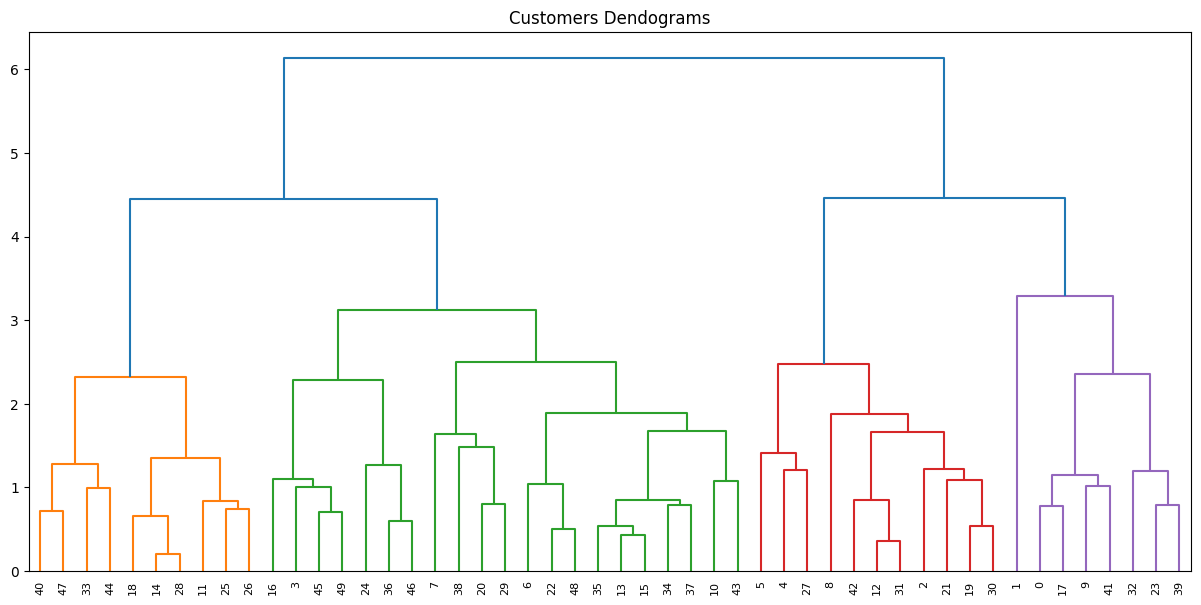

In [60]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as SCH
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.title("Customers Dendograms")
Dendrogram=SCH.dendrogram(SCH.linkage(df.iloc[:,1:5],method ="complete"))

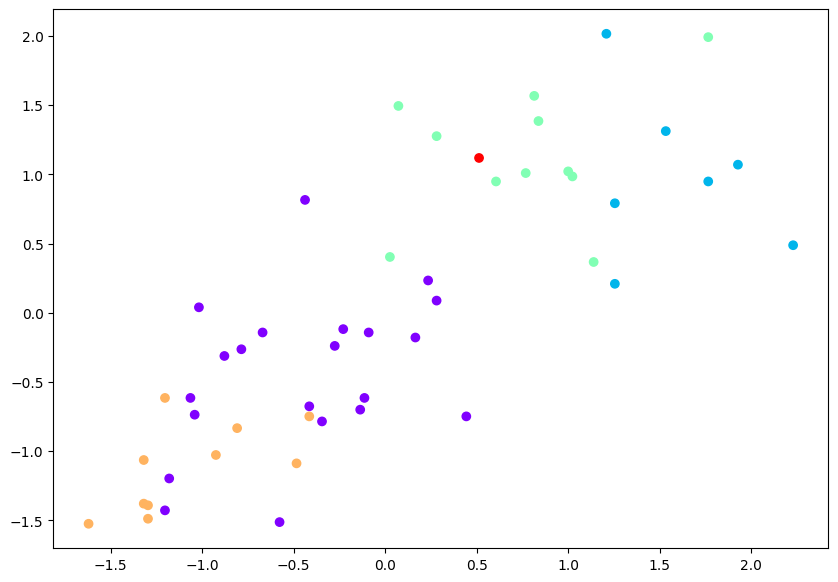

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=hierarchical_cluster.labels_ ,cmap='rainbow')

# K-Mean Clustering

In [53]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814
5,Colorado,0.025976,0.402909,0.869548,1.883901
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723
7,Delaware,-0.437875,0.815030,0.450825,-0.585834
8,Florida,1.765415,1.990786,1.009122,1.150530
9,Georgia,2.229265,0.487757,-0.386621,0.492653


In [54]:
Inertia_Value = []

for i in range(1,10):
    Kmeans = KMeans(n_clusters=i , random_state=45,n_init="auto")
    Kmeans.fit(df.iloc[:,1:5])
    Inertia_Value.append(Kmeans.inertia_)
print(Inertia_Value)

[200.00000000000006, 104.96163315756871, 80.08569526137276, 58.24158433134323, 52.29333804526924, 48.94294342678888, 41.815201120688506, 39.857983368086515, 32.35788819912429]


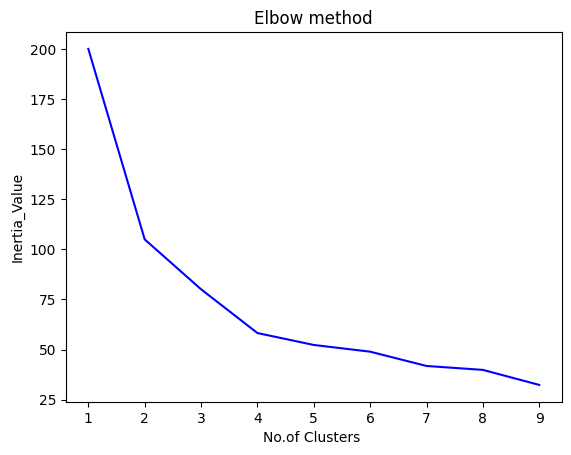

In [55]:
plt.plot(range(1,10),Inertia_Value,color="blue")
plt.xlabel("No.of Clusters ")
plt.title("Elbow method")
plt.ylabel("Inertia_Value")
plt.show()

In [56]:
cluster_new=KMeans(5,random_state=45,n_init="auto")
cluster_new.fit(df.iloc[:,1:5])

KMeans(n_clusters=5, n_init='auto', random_state=45)

In [57]:
cluster_new.labels_

array([1, 4, 3, 1, 4, 4, 2, 2, 4, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 4,
       0, 1, 3, 0, 0, 4, 0, 2, 4, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

# DBSCAN


In [58]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(df.iloc[:,1:5])

DBSCAN(eps=0.8, min_samples=6)

In [59]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0])